# Anthony Botello
## Lab 5, PHYS 434 AD

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import h5py

import scipy
from scipy import stats
from scipy.signal import fftconvolve as convolve

import pickle as pkl

from IPython.display import Image

In [2]:
infile = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pkl.load(infile)
infile.close()
#higgs.columns = ['$P_T$','$\eta$','$\phi$','Mass','$ee_2$','$ee_3$','$d_2$','Angularity','$t_1$','$t_2$','$t_3$','$t_{21}$','$t_{32}$','$K_t\Delta R$']

In [3]:
infile = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pkl.load(infile)
infile.close()
#qcd.columns = ['$P_T$','$\eta$','$\phi$','Mass','$ee_2$','$ee_3$','$d_2$','Angularity','$t_1$','$t_2$','$t_3$','$t_{21}$','$t_{32}$','$K_t\Delta R$']

In [4]:
atlas = Image('ATLAS detector.jpg')

# LHC Data

For this lab we are working with data from the ATLAS particle detector at CERN. The goal of the ATLAS experiment is to look for particles by colliding protons at high center-of-mass energies. The ATLAS detector (shown below) is essentially a cylinder, ~25m in diameter and ~46m long, which contains various sub-detectors.
{{display(atlas)}}
A collimated beam of protons is injected along the axis of the detector. When a $pp$ collision occurs, the products are scattered in all directions and their transverse trajectories are tracked as they interact with the different sub-detectors. The inner tracker has an axial magnetic field that curves the trajectories of charged particles. The curvature of the tracks reveals the particle's charge and momentum. The electromagnetic calorimeter tracks particles that interact electromagnetically by measuring the amount of energy they deposit in the detector. The hadronic calorimeter does the same for particles that interact hadronically. The muon detector is simply there to detect muons.

The way ATLAS looks for particles is by reconstructing the trajectories of the particles resulting from an event ($pp$ collision) leading back to the interaction point (IP). From these jets they can discern certain properties about the particles that were created at the IP. 

For this lab we are working with two data sets: one that measures the expected QCD background of the detector, and another that measures potential Higgs boson signals. Each 14-dimensional vector in a data set gives the following information about a particle jet:
- $p_T$, the transverse momentum
- $\eta$, the pseudorapidity
- $\phi$, the azimuthal angle
- $M$, the mass
- $e_N$, the N-point energy correlation function (ECF)
- $D_2$, a dimensionless ratio of ECFs, defined as $e_3/(e_2)^3$
- $a_3$, the angularity, an observable related to the symmetry of energy flow inside a jet
- $\tau_N$, the "N-subjettiness"
- $\tau_{NM}$, the ratio of "N-subjettiness" to "M-subjettiness"
- $k_t\Delta R$, the angular separation of the branches of a jet

Our goal is to determine how to optimize the data such that we can reduce the background enough to determine if a candidate signal is statistically significant. To accomplish this we need to look through the data to determine the events where we might have a candidate signal and cut out any data where we it is statistically improbable for us to have a candidate signal.

Below we have plotted histograms of a few of these parameters that we found interesting, for both the QCD background and the Higgs signal data.

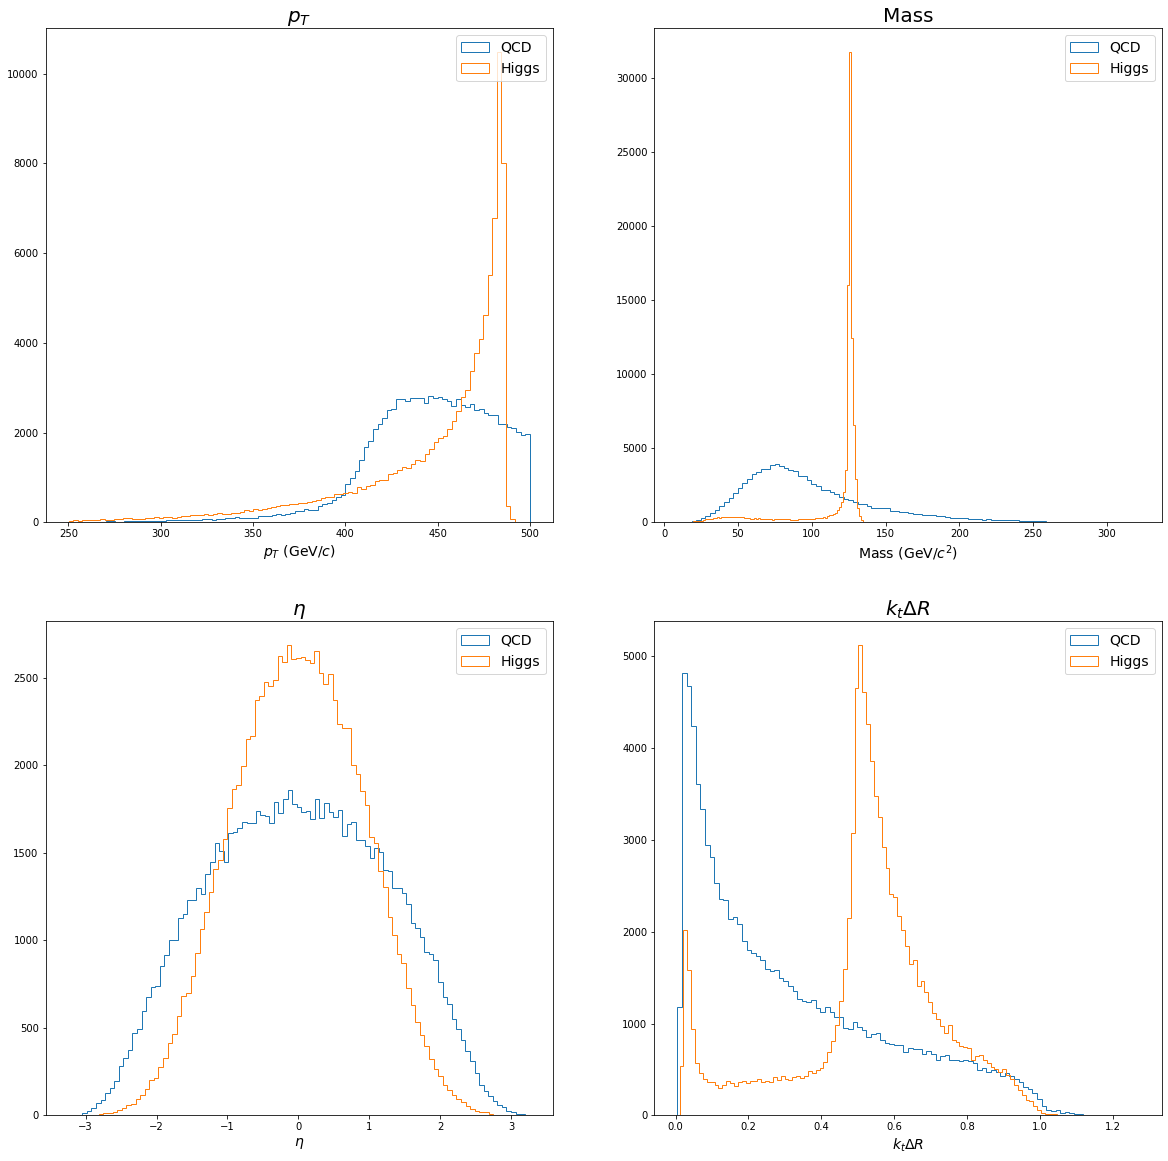

In [5]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,1].hist(qcd['mass'],bins=100,histtype='step',label='QCD')
ax[0,1].hist(higgs['mass'],bins=100,histtype='step',label='Higgs')
ax[0,1].set_xlabel('Mass (GeV/$c^2$)',fontsize=14)
ax[0,1].set_title('Mass',fontsize=20)
ax[0,1].legend(fontsize=14)

ax[0,0].hist(qcd['pt'],bins=100,histtype='step',label='QCD')
ax[0,0].hist(higgs['pt'],bins=100,histtype='step',label='Higgs')
ax[0,0].set_xlabel('$p_T$ (GeV/$c$)',fontsize=14)
ax[0,0].set_title('$p_T$',fontsize=20)
ax[0,0].legend(fontsize=14)

ax[1,0].hist(qcd['eta'],bins=100,histtype='step',label='QCD')
ax[1,0].hist(higgs['eta'],bins=100,histtype='step',label='Higgs')
ax[1,0].set_xlabel('$\eta$',fontsize=14)
ax[1,0].set_title('$\eta$',fontsize=20)
ax[1,0].legend(fontsize=14)

ax[1,1].hist(qcd['KtDeltaR'],bins=100,histtype='step',label='QCD')
ax[1,1].hist(higgs['KtDeltaR'],bins=100,histtype='step',label='Higgs')
ax[1,1].set_xlabel('$k_t\Delta R$',fontsize=14)
ax[1,1].set_title('$k_t\Delta R$',fontsize=20)
ax[1,1].legend(fontsize=14)

plt.show()

The first histograms above show clear ranges of disparity between the QCD background and the Higgs data. One strategy for event selection might be to try to find some common overlap between these ranges and make sure that these are preserved. For example, since the Higgs mass spikes at {{np.argmax(np.bincount(higgs.mass))}} GeV/c$^2$, we could preserve the data around this spike for both the Higgs data and the QCD background while cutting out the rest.

In [6]:
def make_hist(i,parameter):
    ax[i].hist(qcd[parameter],bins=100,histtype='step',density=True,label='QCD')
    ax[i].hist(higgs[parameter],bins=100,histtype='step',density=True,label='Higgs')
    ax[i].set_xlabel(parameter,fontsize=14)
    ax[i].set_title(parameter + ', Linear',fontsize=18)
    ax[i].legend(fontsize=14)

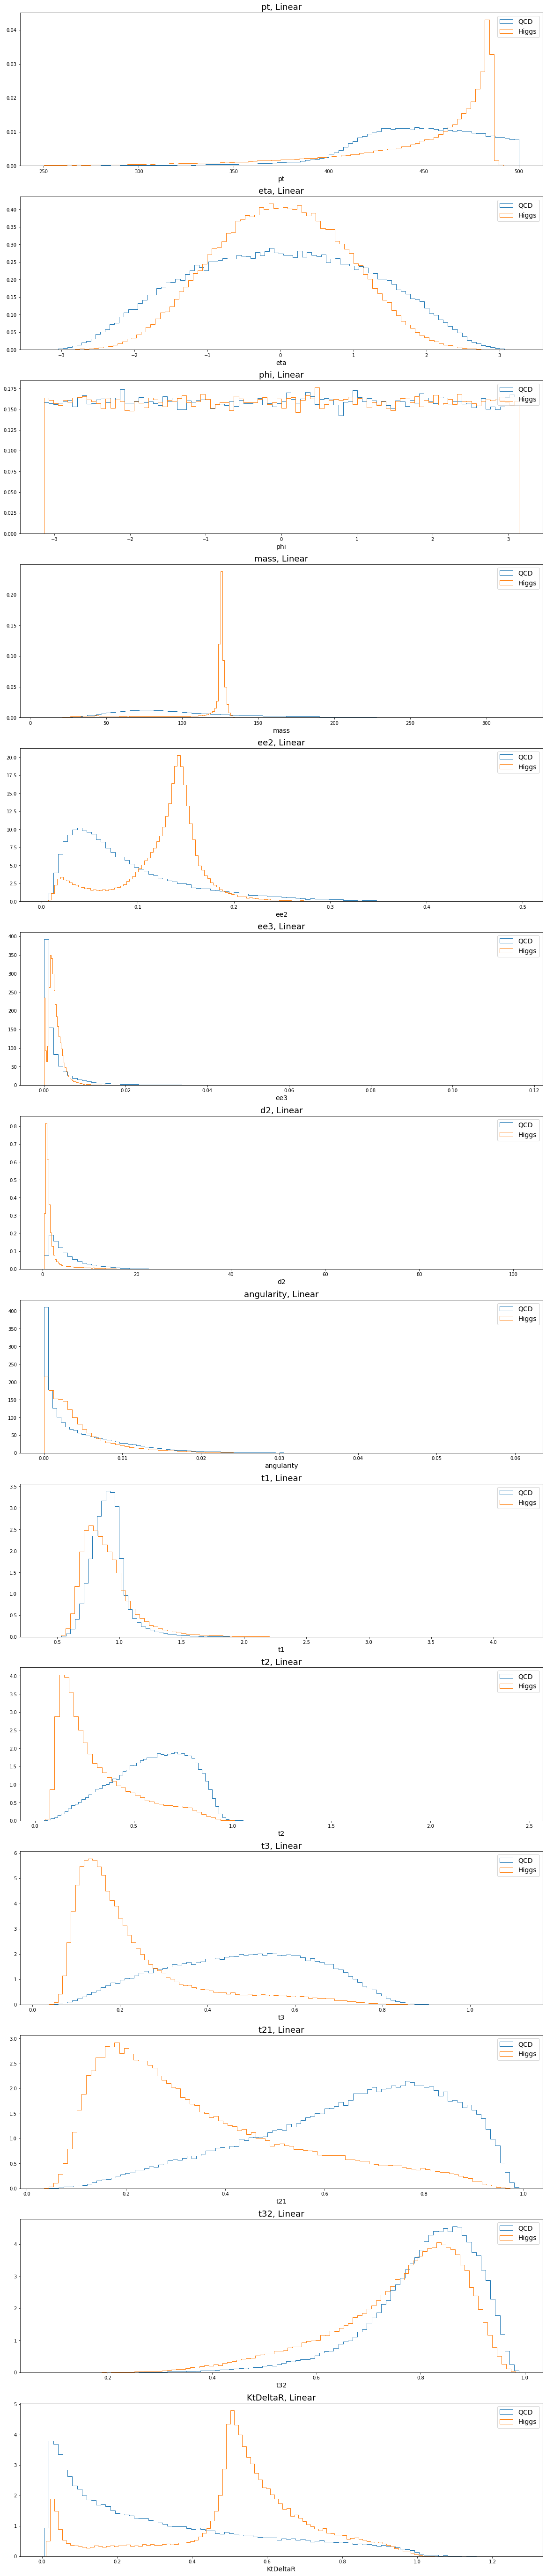

In [7]:
fig,ax = plt.subplots(14,1,figsize=(20,100))

i = 0
for param in higgs:
    make_hist(i,param)
    i += 1